## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [3]:
data = pd.read_csv("C:/Users/lenovo/OneDrive - Hanoi University of Science and Technology/Desktop/Đồ án 2/Thực hành/data/FPT_10year.csv")
data = data.round(2)

In [4]:
data.head()

,Date,Close,High,Low,Open,Volume
0,2010-01-04,8174.86,8174.86,7828.05,8026.23,2279397
1,2010-01-05,8174.86,8472.13,8174.86,8472.13,1935195
2,2010-01-06,8026.23,8273.95,7877.59,8174.86,917767
3,2010-01-07,7976.68,8075.77,7927.14,8026.23,993704
4,2010-01-08,7728.96,8125.32,7728.96,8125.32,1562937


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742 entries, 0 to 2741
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2742 non-null   object 
 1   Close   2742 non-null   float64
 2   High    2742 non-null   float64
 3   Low     2742 non-null   float64
 4   Open    2742 non-null   float64
 5   Volume  2742 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 128.7+ KB


In [6]:
data["Date"] = pd.to_datetime(data["Date"])

In [7]:
data.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

## Exploration


### Price

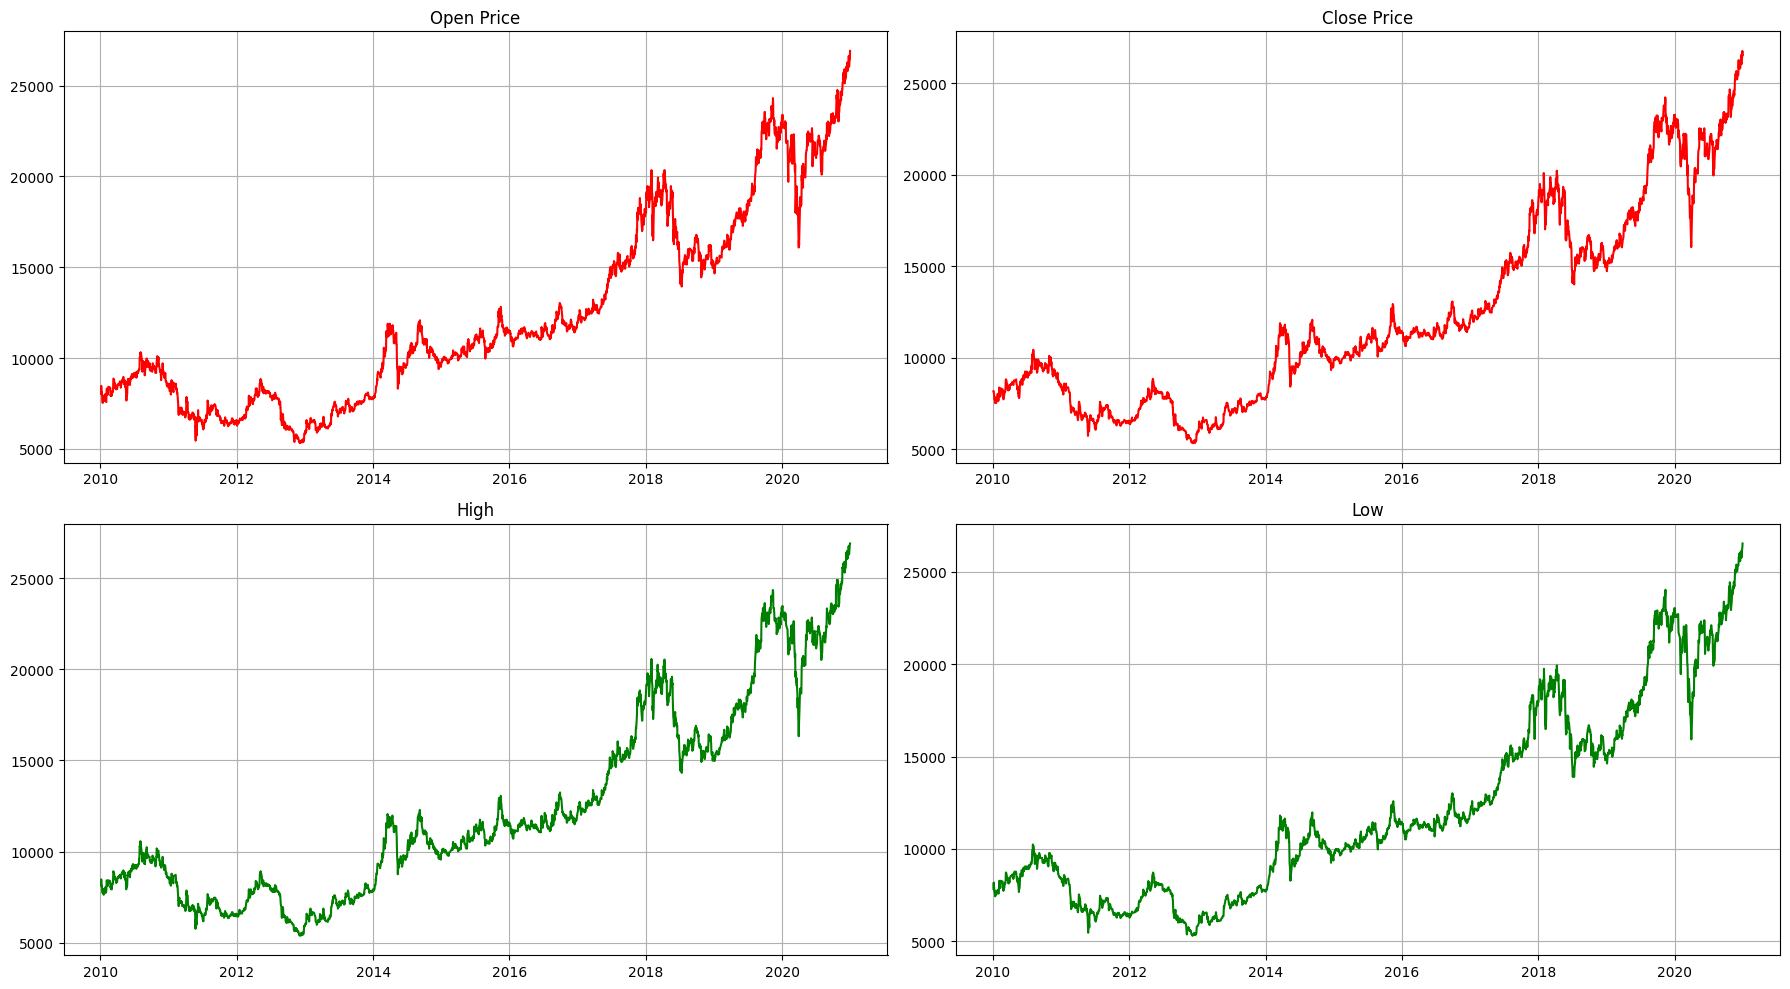

In [8]:
plt.figure(figsize=(18, 10)) 

# Open
x = data["Date"]
y = data["Open"]
plt.subplot(2,2,1)
plt.plot(x, y, color = "red")
plt.title("Open Price")
plt.grid()

# Close
x = data["Date"]
y = data["Close"]
plt.subplot(2,2,2)
plt.plot(x,y, color = "red")
plt.title("Close Price")
plt.grid()

# Close
x = data["Date"]
y = data["High"]
plt.subplot(2,2,3)
plt.plot(x,y, color = "green")
plt.title("High")
plt.grid()

# Close
x = data["Date"]
y = data["Low"]
plt.subplot(2,2,4)
plt.plot(x,y, color = "green")
plt.title("Low")
plt.grid()

plt.tight_layout()
plt.show()

### Volume

Text(0.5, 1.0, 'Volume')

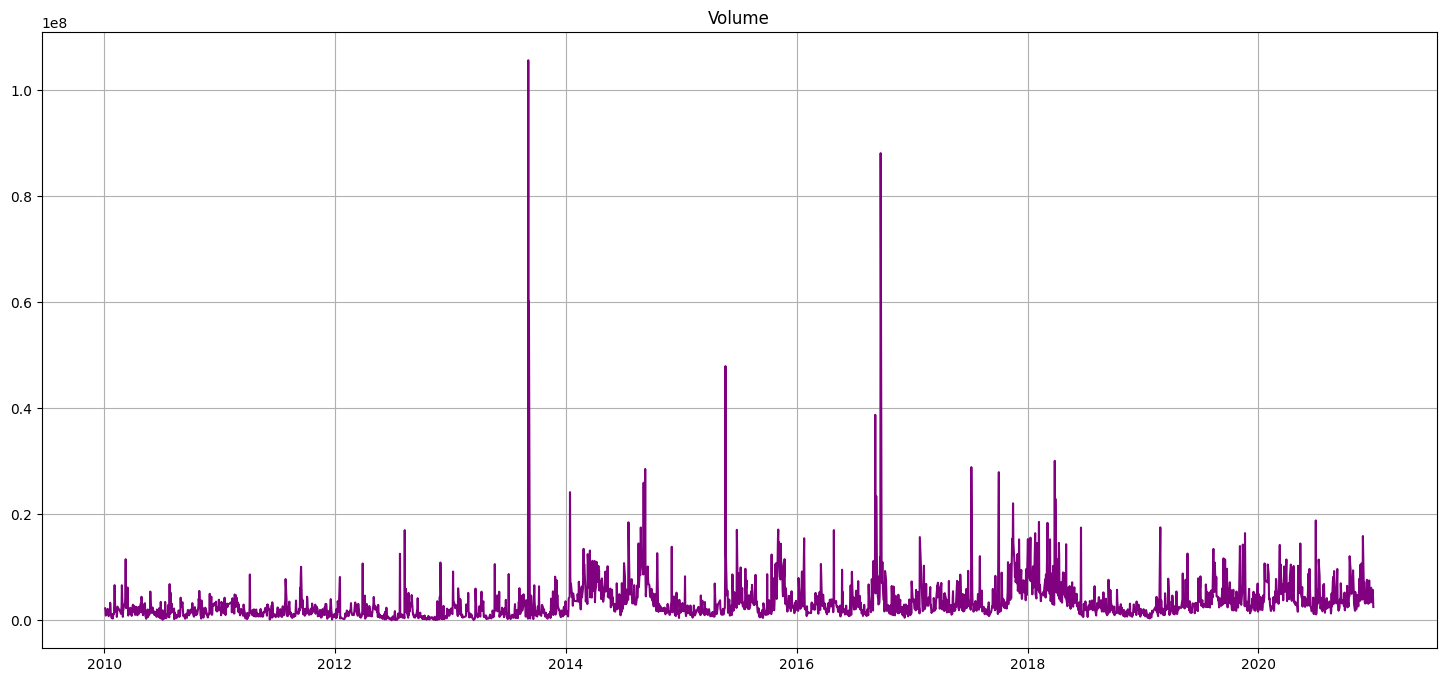

In [9]:
plt.figure(figsize=(18, 8)) 
x = data["Date"]
y = data["Volume"]
plt.plot(x,y, color = 'purple')
plt.grid()
plt.title("Volume")

## Feature Scaling

In [10]:
size = int(len(data)*0.8)
train_data = data[:size]
test_data = data[size:]

In [11]:
train_data.shape

(2193, 6)

In [12]:
training_set = train_data.iloc[:,4:5].values

In [13]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler(feature_range=(0,1))
training_set_scaled_price = x.fit_transform(training_set)

In [14]:
x_train = []
y_train = []
for i in range(60, 2193):
    x_train.append(training_set_scaled_price[i-60:i,0])
    y_train.append(training_set_scaled_price[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
x_train.shape

(2133, 60)

In [16]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

## Bulding RNN 

### Import Keras Libraries and Packages

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Bulding RNN

#### Initialization

In [18]:
rnn = Sequential()

In [19]:
rnn.add(LSTM(units = 45, return_sequences=True, input_shape = (x_train.shape[1],1)))
rnn.add(Dropout(0.25))

rnn.add(LSTM(units = 45, return_sequences=True))
rnn.add(Dropout(0.25))

rnn.add(LSTM(units = 45, return_sequences=True))
rnn.add(Dropout(0.25))

rnn.add(LSTM(units = 45))
rnn.add(Dropout(0.25))

C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### Add the Output Layer

In [20]:
rnn.add(Dense(units = 1))

#### Compile RNN

In [21]:
rnn.compile(optimizer = "adam", loss = "mean_squared_error")

rnn.fit(x_train, y_train, epochs = 50, batch_size=32)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 0.0410
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0040
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0035
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.0030
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.0038
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.0035
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 0.0029
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.0026
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0025
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0023
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 0.0026
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 0.0022
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 0.0024
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.0025
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.0026
Epo

In [22]:
test_sp = test_data.iloc[:,4:5].values

In [23]:
test_data.shape

(549, 6)

In [24]:
df_inputs = data["Open"].iloc[len(data) - len(test_data)-60:].values
df_inputs = df_inputs.reshape(-1,1)
df_inputs = x.transform(df_inputs)
x_test = []
for i in range(60, 609):
    x_test.append(df_inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
predicted_sp = rnn.predict(x_test)
predicted_sp = x.inverse_transform(predicted_sp)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step


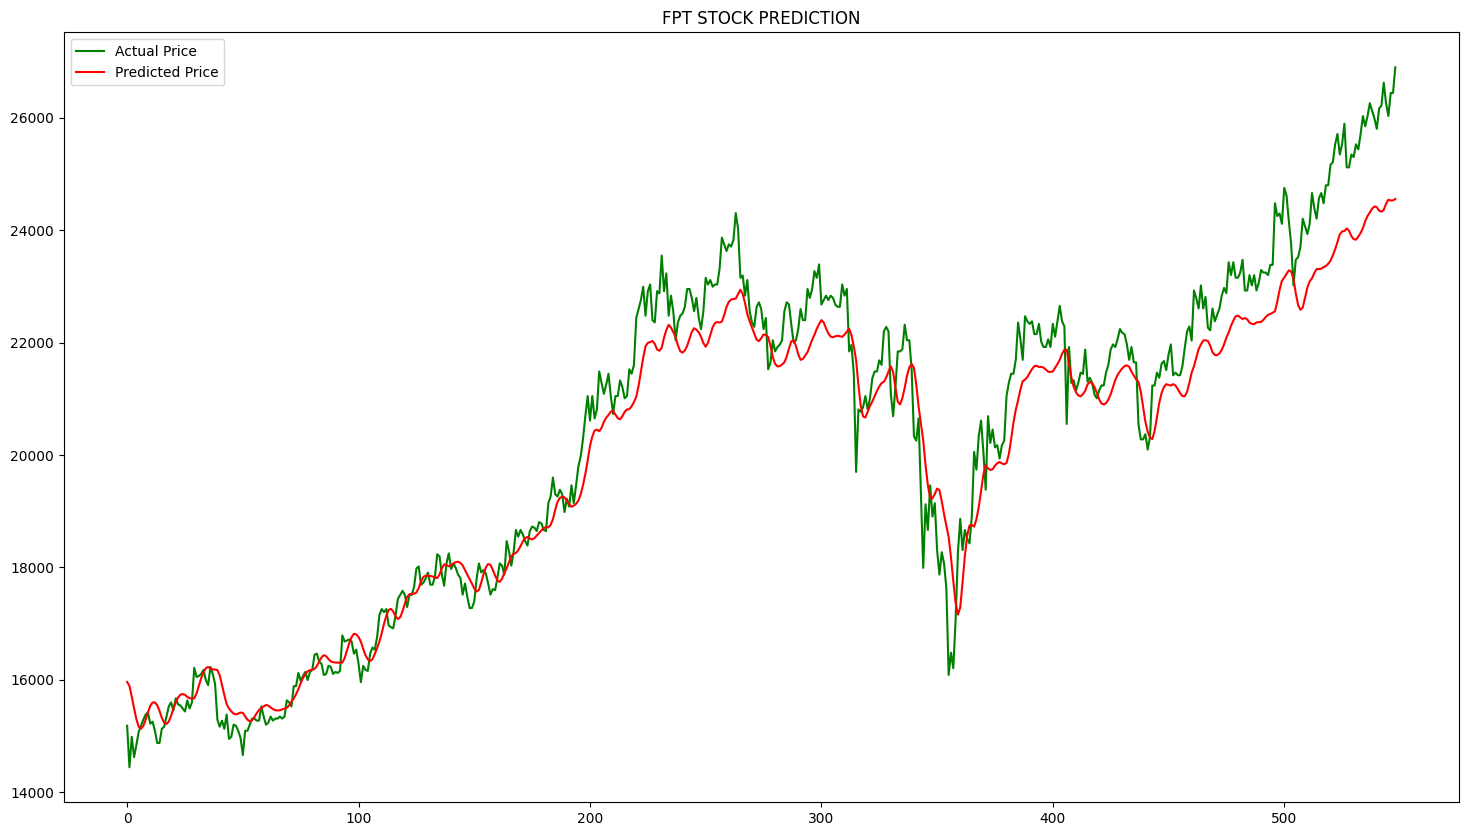

In [25]:
plt.figure(figsize=(18,10))
plt.plot(test_sp, color = 'green', label = 'Actual Price')
plt.plot(predicted_sp, color = 'red', label = 'Predicted Price')
plt.title("FPT STOCK PREDICTION")
plt.legend()
plt.grid
plt.show()

In [26]:
print(predicted_sp)

[[15962.074 ]
 [15890.647 ]
 [15702.19  ]
 [15492.972 ]
 [15297.947 ]
 [15164.521 ]
 [15127.363 ]
 [15179.622 ]
 [15289.4   ]
 [15419.165 ]
 [15535.415 ]
 [15594.519 ]
 [15596.903 ]
 [15546.144 ]
 [15444.383 ]
 [15321.391 ]
 [15236.611 ]
 [15212.604 ]
 [15255.77  ]
 [15358.187 ]
 [15490.899 ]
 [15599.8125]
 [15684.25  ]
 [15733.286 ]
 [15747.121 ]
 [15731.096 ]
 [15693.989 ]
 [15672.659 ]
 [15662.6455]
 [15669.619 ]
 [15757.365 ]
 [15893.35  ]
 [16028.504 ]
 [16133.117 ]
 [16205.085 ]
 [16228.003 ]
 [16201.251 ]
 [16183.525 ]
 [16182.357 ]
 [16172.095 ]
 [16079.122 ]
 [15907.746 ]
 [15725.557 ]
 [15570.356 ]
 [15489.802 ]
 [15438.948 ]
 [15397.017 ]
 [15383.521 ]
 [15397.439 ]
 [15415.537 ]
 [15410.3955]
 [15348.007 ]
 [15288.211 ]
 [15261.878 ]
 [15279.335 ]
 [15335.408 ]
 [15405.762 ]
 [15462.505 ]
 [15493.233 ]
 [15526.862 ]
 [15550.069 ]
 [15540.629 ]
 [15506.974 ]
 [15478.02  ]
 [15458.961 ]
 [15453.02  ]
 [15457.571 ]
 [15471.501 ]
 [15486.099 ]
 [15500.277 ]
 [15544.092 ]
 [1560

In [27]:
print(test_data["Open"])

2193    15182.43
2194    14442.27
2195    14983.85
2196    14622.80
2197    14839.43
          ...   
2737    26262.36
2738    26034.00
2739    26445.06
2740    26445.06
2741    26901.79
Name: Open, Length: 549, dtype: float64


In [28]:
y_test = test_data["Open"].values
y_test = y_test.reshape(-1, 1)
predicted_sp = predicted_sp.flatten()
y_test = y_test.flatten()


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score
r2 = r2_score(y_test, predicted_sp)
mae = mean_absolute_error(y_test, predicted_sp)
mape = np.mean(np.abs((y_test, predicted_sp) / y_test)) * 100


In [30]:
print(r2)
print(mae)

print(mape)

0.9389972357288662
590.0785579604964
99.26471746945688
